In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#将整个文件的图片按标签分成4类

import shutil  #用于移动文件

list = pd.read_csv('./train.csv')
labels = np.array(list['label'])

In [3]:
#读取每张图片按照其分类复制到相应的文件夹中
imgs = os.listdir('./train')
imgnum = len(imgs)
j = 0
for i in range(imgnum):
    label = labels[i]
    shutil.move('./train/'+str(j)+'.jpg', './train_new/'+str(label)+'/'+str(j)+'.jpg')
    j+=1

In [4]:
num0 = len(os.listdir('./train_new/0'))
num1 = len(os.listdir('./train_new/1'))
num2 = len(os.listdir('./train_new/2'))
num3 = len(os.listdir('./train_new/3'))
num_test = len(os.listdir('./test_new/test'))
print(num0, num1, num2, num3, num_test)


2515 1619 708 1158 856


In [5]:
PATH = os.getcwd()
train_dir = os.path.join(PATH,'train_new')
validation_dir = os.path.join(PATH,'val_new')
test_dir = os.path.join(PATH,'test_new')

In [6]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
#数据准备
# 1.从磁盘读取图像。
# 2.解码这些图像的内容，并根据其RGB内容将其转换为适当的网格格式。
# 3.将它们转换为浮点张量。
# 4.重新确定从0到255之间的值到0到1之间的值，因为神经网络更喜欢处理小的输入值。

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_image_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')

Found 6000 images belonging to 4 classes.


In [9]:
validation_image_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')

Found 140 images belonging to 4 classes.


In [10]:
test_image_gen = test_image_generator.flow_from_directory(batch_size = batch_size,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         class_mode = 'categorical')

Found 856 images belonging to 1 classes.


In [11]:
sample_training_images, _= next(train_image_gen)

In [33]:
def plotImage(image_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
#plt.imshow()函数负责对图像进行处理，并显示其格式，而plt.show()则是将plt.imshow()处理后的函数显示出来。

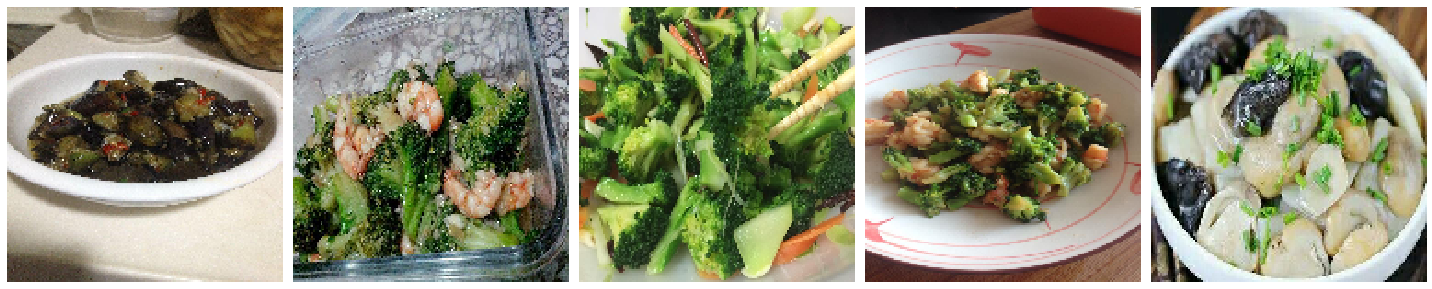

In [36]:
plotImage(sample_training_images[:5])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Activation

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(4),
    Activation('softmax')
])

In [13]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [15]:
history = model.fit_generator(
    train_image_gen,
    steps_per_epoch=6000//batch_size,
    epochs=epochs,
    validation_data= validation_image_gen,
    validation_steps=140//batch_size
)

Epoch 1/20
46/46 [==============================] - 276s 6s/step - loss: 1.2318 - accuracy: 0.5002 - val_loss: 1.2830 - val_accuracy: 0.4297
Epoch 2/20
46/46 [==============================] - 209s 5s/step - loss: 1.0840 - accuracy: 0.6579 - val_loss: 1.1613 - val_accuracy: 0.5781
Epoch 3/20
46/46 [==============================] - 199s 4s/step - loss: 1.0203 - accuracy: 0.7183 - val_loss: 1.0965 - val_accuracy: 0.6328
Epoch 4/20
46/46 [==============================] - 197s 4s/step - loss: 0.9945 - accuracy: 0.7478 - val_loss: 1.1040 - val_accuracy: 0.6250
Epoch 5/20
46/46 [==============================] - 265s 6s/step - loss: 0.9598 - accuracy: 0.7858 - val_loss: 1.0467 - val_accuracy: 0.6875
Epoch 6/20
46/46 [==============================] - 310s 7s/step - loss: 0.9584 - accuracy: 0.7805 - val_loss: 1.0313 - val_accuracy: 0.7344
Epoch 7/20
46/46 [==============================] - 315s 7s/step - loss: 0.9304 - accuracy: 0.8110 - val_loss: 1.0224 - val_accuracy: 0.7344
Epoch 8/20
46

In [19]:
from tensorflow.keras.preprocessing import image
from PIL import Image   #导入Image模块

#def load_and_preprocess_image(path):
    #image0 = tf.io.read_file(path)
    #image0 = tf.gfile.FastGFile('test.jpg','rb').read()
    #image0 = tf.read_file(path)
#    image0 = Image.open(path)
#    return preprocess_image(image0)

#def preprocess_image(image):
#    image = tf.image.decode_jpeg(image, channels=3)
#    image = tf.image.resize(image,[IMG_HEIGHT,IMG_WIDTH])
#    image /= 255.0
#    return image

#test_image = []
#for i in os.listdir('./test_new/test'):
#    test_image.append(load_and_preprocess_image(i))

def get_imlist(path):   #此函数读取特定文件夹下的jpg格式图像，返回图片所在路径的列表
 
    return [os.path.join(path,f) for f in os.listdir(path)]
    #return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

#r""是防止字符串转译
ctest=get_imlist(r"./test_new/test")
#print (ctest)     #这里以list形式输出jpg格式的所有图像（带路径）

test_images = np.empty((856,IMG_HEIGHT, IMG_WIDTH,3))
dtest = 856
while dtest>0:
    img = Image.open(ctest[dtest-1])
    img = img.resize((IMG_HEIGHT, IMG_WIDTH),Image.BILINEAR)
    img_ndarray=np.asarray(img,dtype='float64')/255  #将图像转化为数组并将像素转化到0-1之间
    #print(img_ndarray.shape)
    test_images[dtest-1]=img_ndarray    #将图像的矩阵形式保存到data中
    dtest=dtest-1

In [ ]:
predictions = model.predict(test_image_gen)

test_pred = []
test_label = []

ind = 0
for i in predictions:
    test_pred.append([ind, i])
    test_label.append([ind, np.argmax(i)])
    ind = ind+1

In [ ]:
df0 = pd.DataFrame(test_pred)
df = pd.DataFrame(test_label)

print(df0)
print(df)

In [18]:
outputpath = 'test_output5.csv'
df.to_csv(outputpath, sep=',', index=False, header=False)